In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
dt = pd.read_csv('C:\\Users\\Admin\\Downloads\\Case_study_CarPrice_Assignment.csv')
dt

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [3]:
# tách hãng xe ra từ cột CarName
maker = dt['CarName'].str.split(" ", n=1, expand = True)
dt['Carmaker'] = maker[0]
dt

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carmaker
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [4]:
# kiểm tra các value của cột Carmaker để xem dữ liệu bị sai/ khuyết thiếu
dt['Carmaker'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [5]:
dt = dt.apply(lambda x: x.replace(
    {'maxda' : 'mazda', 'Nissan' : 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen','vw': 'volkswagen'},
    regex=True))

# Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu

In [6]:
# kiểm tra thuộc tính các columns
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Nhận xét: không có dữ liệu bị khuyết thiếu trong dataset

# Xử lý outliner trong dataset

In [7]:
import numpy as np

In [8]:
# lọc các cột chứa các biến định lượng
numerical_features = [col for col in dt.columns if np.issubdtype(dt[col].dtype, np.number)]
print(numerical_features)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [9]:
# xóa bỏ col 'symboling' vì đây là ordinal data
del numerical_features[0]
del numerical_features[0]
print(numerical_features)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [10]:
# xây dựng module tìm kiếm outliner và thay thế outliner bằng giá trị min, max không phải là ngoại lệ
def replace_numerical_outliers(column_name):
    Q1 = dt[column_name].quantile(0.25)
    Q3 = dt[column_name].quantile(0.75)
    IQR = Q3-Q1
    dt.replace(dt[column_name] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR)
    dt.replace(dt[column_name] > (Q3+ 1.5* IQR), Q3+ 1.5* IQR)

In [11]:
# chạy module với từng cột chứa biến định lượng
for val in numerical_features:
    replace_numerical_outliers(val)

In [12]:
dt

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carmaker
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


# Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định

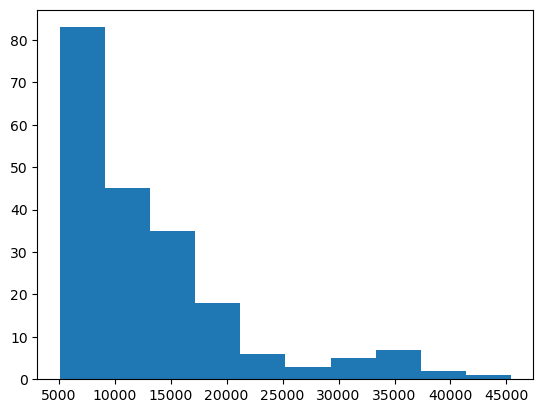

In [13]:
plt.hist(dt['price'])
plt.show()

- Người dùng có xu hướng mua xe nằm trong phân khúc giá thấp (từ 5000- 15000)
- Khi giá thành càng cao thì loại xe này càng được ít người lựa chọn

In [14]:
# khởi tạo 1 list chứa các thuộc tính có mối quan hệ với price
effect = []

> ### Kiểm định mối quan hệ giữa 2 biến định lượng

In [15]:
# MODULE
def hypothesis(a,b):
    r, pvalue = pearsonr(dt[a], dt[b])
    if pvalue >= 0.05:
        print(pvalue, '>0.05')
        print('Hai thuộc tính {0} và {1} không có liên hệ với nhau'.format(a,b))
    else:
        if a not in effect:
            effect.append(a)
        if r>0: 
            print('pvalue =', pvalue, '<0.05 và r =',r, '>0')
            print('Hai thuộc tính {0} và {1} có mối quan hệ thuận chiều'.format(a,b))
        elif r<0:
            print('pvalue =', pvalue, '<0.05 và r =',r, '<0')
            print('Hai thuộc tính {0} và {1} có mối quan hệ ngược chiều'.format(a,b))
        elif r == 1:
            print('pvalue =', pvalue, '<0.05 và r =',r, '=1')
            print('Hai thuộc tính {0} và {1} có mối quan hệ chặt'.format(a,b))
    sns.lmplot(x = a, y = b, data = dt)
    plt.show()

pvalue = 1.1828204863378005e-19 <0.05 và r = 0.57781559829215 >0
Hai thuộc tính wheelbase và price có mối quan hệ thuận chiều


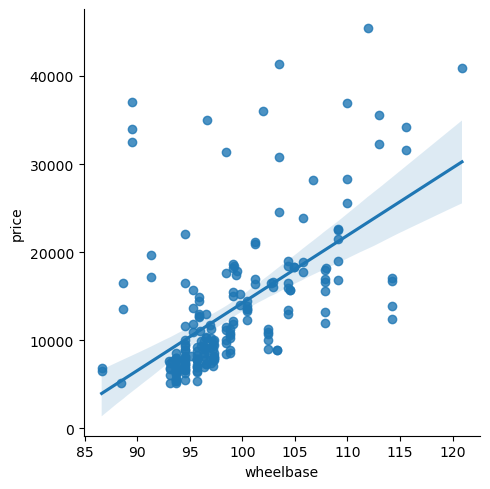

In [16]:
hypothesis('wheelbase','price')

pvalue = 1.6787066240746602e-29 <0.05 và r = 0.6829200156779622 >0
Hai thuộc tính carlength và price có mối quan hệ thuận chiều


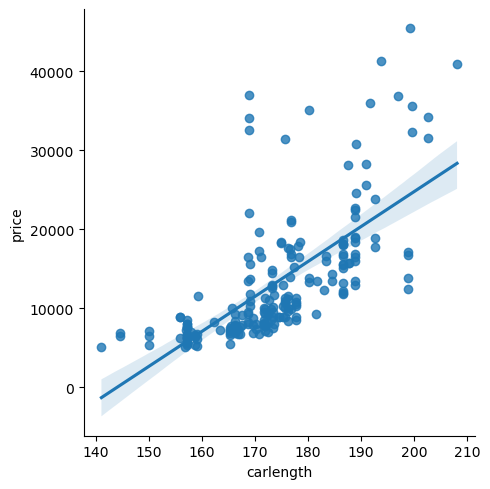

In [17]:
hypothesis('carlength','price')

pvalue = 9.627437876120389e-40 <0.05 và r = 0.7593252997415113 >0
Hai thuộc tính carwidth và price có mối quan hệ thuận chiều


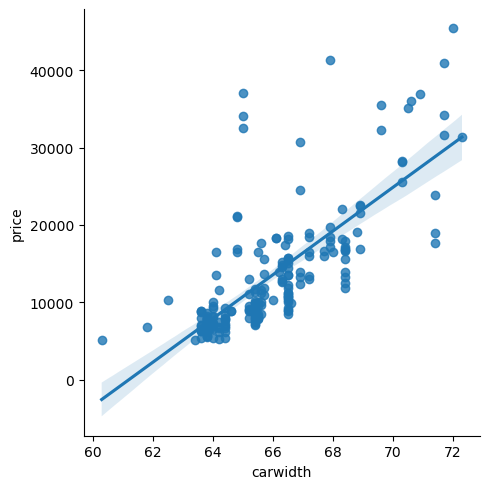

In [18]:
hypothesis('carwidth','price')

0.08832832352275669 >0.05
Hai thuộc tính carheight và price không có liên hệ với nhau


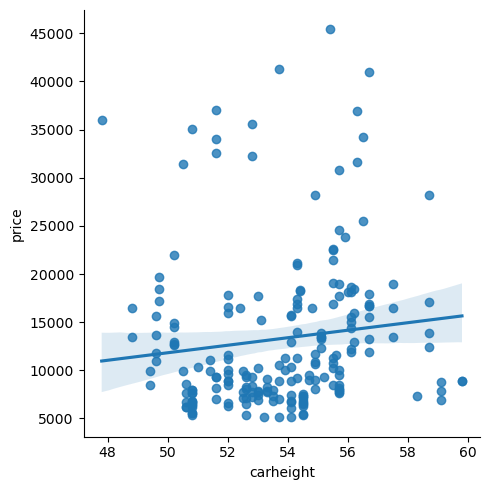

In [19]:
hypothesis('carheight', 'price')

pvalue = 1.2144448264033587e-54 <0.05 và r = 0.8353048793372965 >0
Hai thuộc tính curbweight và price có mối quan hệ thuận chiều


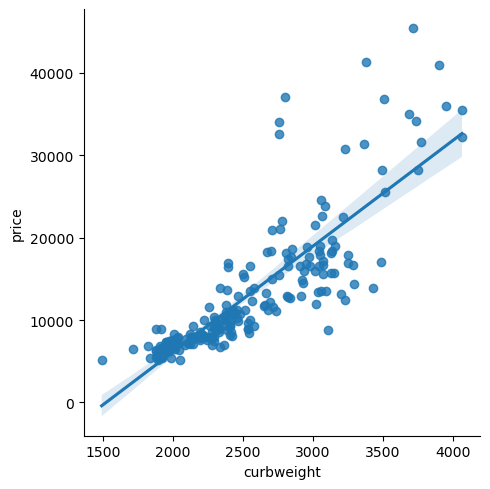

In [20]:
hypothesis('curbweight', 'price')

pvalue = 1.3547637598647268e-65 <0.05 và r = 0.8741448025245118 >0
Hai thuộc tính enginesize và price có mối quan hệ thuận chiều


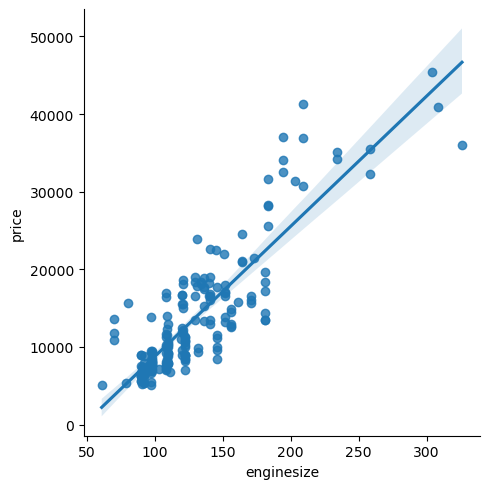

In [21]:
hypothesis('enginesize', 'price')

pvalue = 7.907922278249421e-18 <0.05 và r = 0.5531732367984437 >0
Hai thuộc tính boreratio và price có mối quan hệ thuận chiều


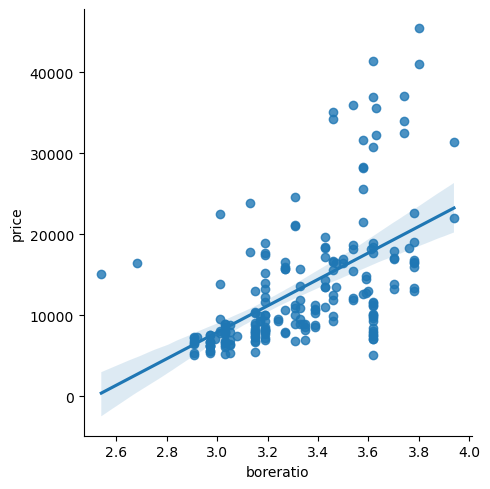

In [22]:
hypothesis('boreratio', 'price')

0.2575137159091036 >0.05
Hai thuộc tính stroke và price không có liên hệ với nhau


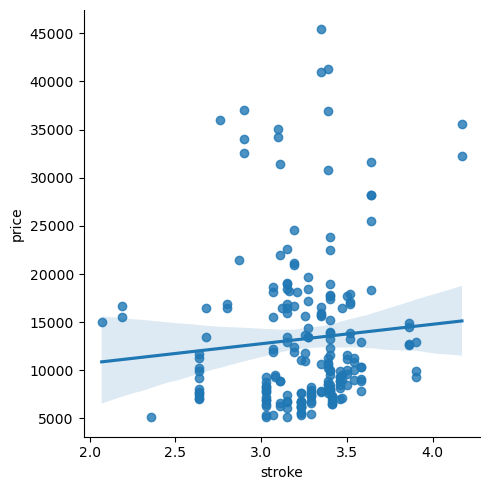

In [23]:
hypothesis('stroke', 'price')

0.3327723612238307 >0.05
Hai thuộc tính compressionratio và price không có liên hệ với nhau


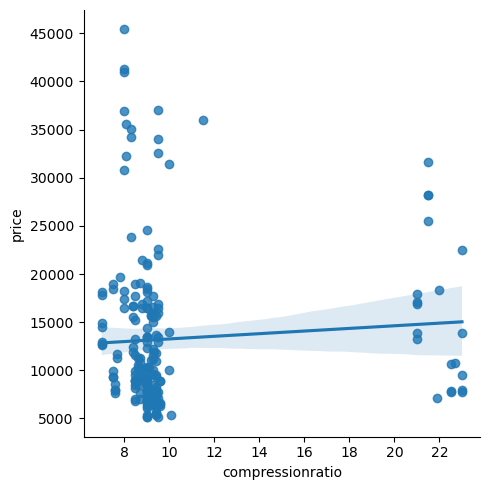

In [24]:
hypothesis('compressionratio', 'price')

pvalue = 1.4834365732940913e-48 <0.05 và r = 0.8081388225362217 >0
Hai thuộc tính horsepower và price có mối quan hệ thuận chiều


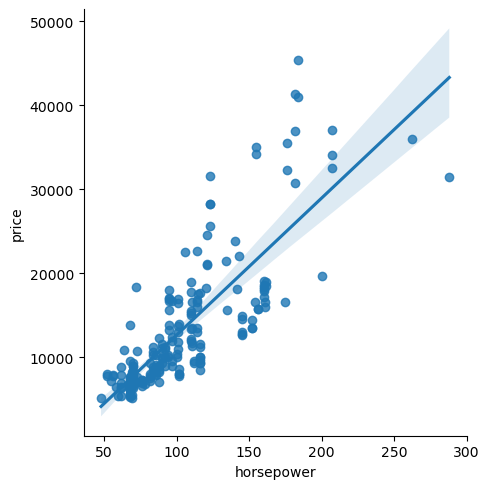

In [25]:
hypothesis('horsepower', 'price')

0.22414123444667824 >0.05
Hai thuộc tính peakrpm và price không có liên hệ với nhau


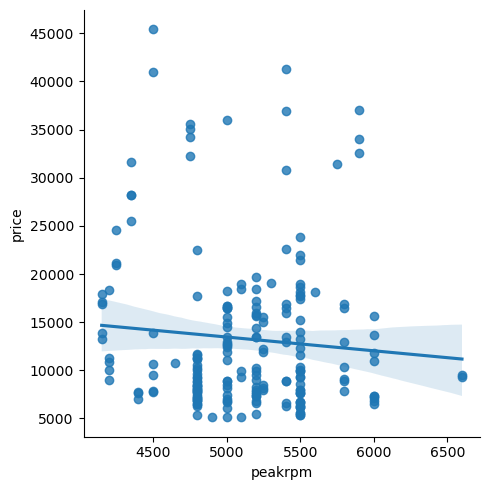

In [26]:
hypothesis('peakrpm', 'price')

pvalue = 7.978684249663976e-30 <0.05 và r = -0.6857513360270397 <0
Hai thuộc tính citympg và price có mối quan hệ ngược chiều


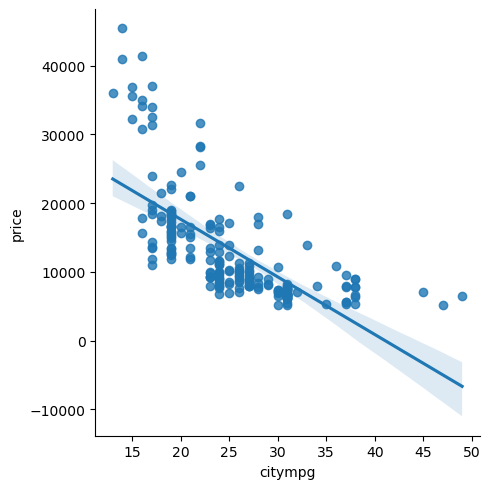

In [27]:
hypothesis('citympg', 'price')

pvalue = 3.230681380364601e-31 <0.05 và r = -0.6975990916465564 <0
Hai thuộc tính highwaympg và price có mối quan hệ ngược chiều


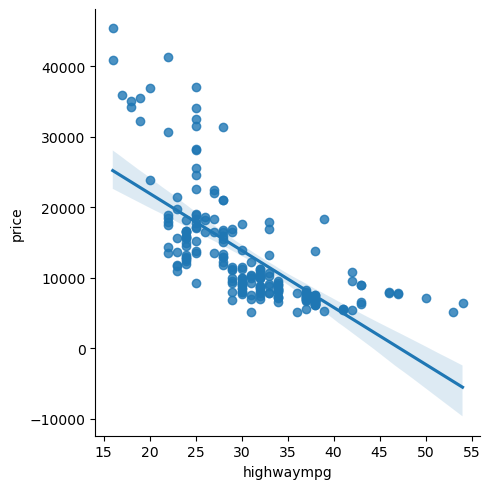

In [28]:
hypothesis('highwaympg', 'price')

> ### Kiểm định mối liên hệ giữa biến định tính (ordinal data) và biến định lượng (price)

In [29]:
from scipy import stats

In [30]:
r, pvalue = stats.spearmanr(dt['symboling'], dt['price'])
if pvalue < 0.05:
    print(pvalue, '<0.05')
    print('Hai thuộc tính {0} và {1} có liên hệ với nhau'.format('symboling', 'price'))
    effect.append('symboling')
else:
    print(pvalue, '> = 0.05')
    print('Hai thuộc tính {0} và {1} không có liên hệ với nhau'.format('symboling', 'price'))

0.038471520131821965 <0.05
Hai thuộc tính symboling và price có liên hệ với nhau


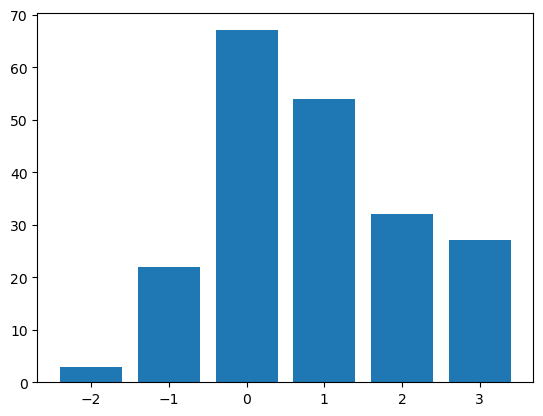

In [31]:
symbol = dt.groupby('symboling')['car_ID'].count()
plt.bar(symbol.index, symbol.values)
plt.show()

- Phần lớn các xe nằm ở mức độ an toàn 0

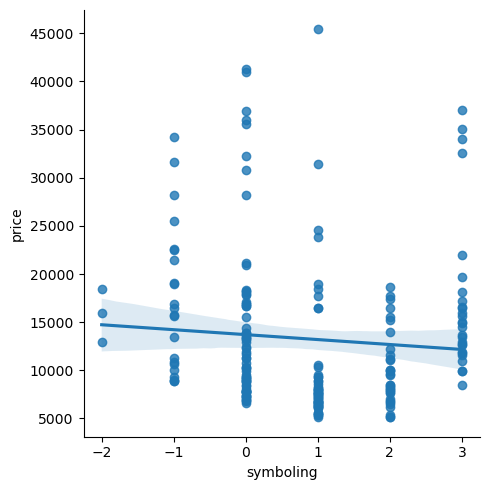

In [32]:
sns.lmplot( x= 'symboling', y = 'price', data = dt)
plt.show()

- Nhận xét: Giá thành xe càng thấp, mức độ an toàn càng thấp

> ### Kiểm định mối liên hệ giữa biến định tính (nominal data) và biến định lượng (price) = One- way ANOVA test

In [33]:
from scipy.stats import f_oneway
def hypo(e1,e2):
    CategoryGroupLists=dt.groupby(e1)[e2].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    if AnovaResults[1] < 0.05:
        print('P-Value for Anova is: ', AnovaResults[1], '<0.05')
        print('Hai thuộc tính {0} và {1} có liên hệ với nhau'.format(e1,e2))
        effect.append(e1)
    else:
        print('P-Value for Anova is: ', AnovaResults[1], '> 0.05')
        print('Hai thuộc tính {0} và {1} không có liên hệ với nhau'.format(e1,e2))

In [34]:
def illu(x1):
    plot1 = dt.groupby(x1)['car_ID'].count()
    plt.bar(plot1.index, plot1.values)
    plt.title('So sánh số lượng xe sử dụng {0}'.format(x1))
    plt.show()

    sns.boxplot(x = x1,y = 'price', data = dt)
    plt.title('Mối quan hệ giữa {0} và price'.format(x1))
    plt.show()

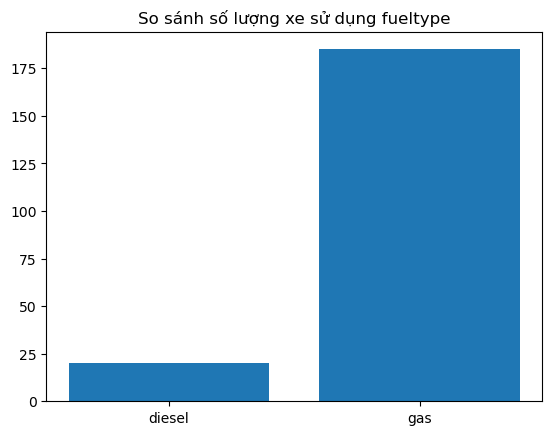

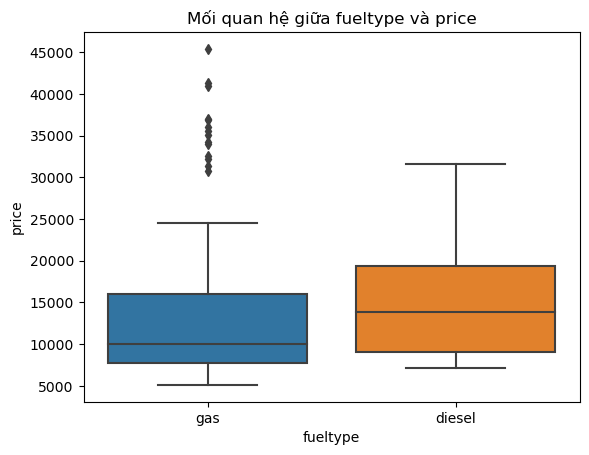

P-Value for Anova is:  0.13153563336537924 > 0.05
Hai thuộc tính fueltype và price không có liên hệ với nhau


In [35]:
illu('fueltype')
hypo('fueltype', 'price')

## Nhìn vào biểu đồ thấy được:
- Các loại xe chạy bằng diesel sẽ có giá thành cao hơn
- Xe chạy bằng gas được ưa chuộng hơn (có thể do giá thành rẻ hơn)

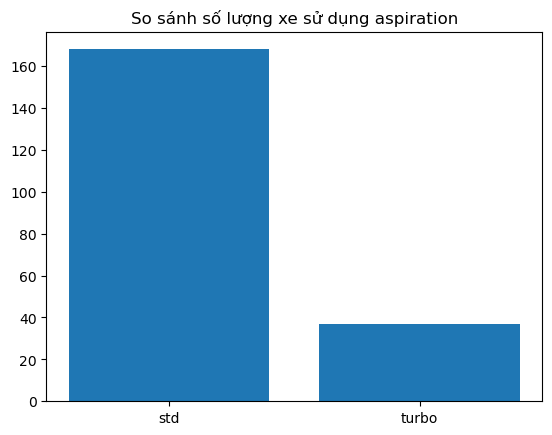

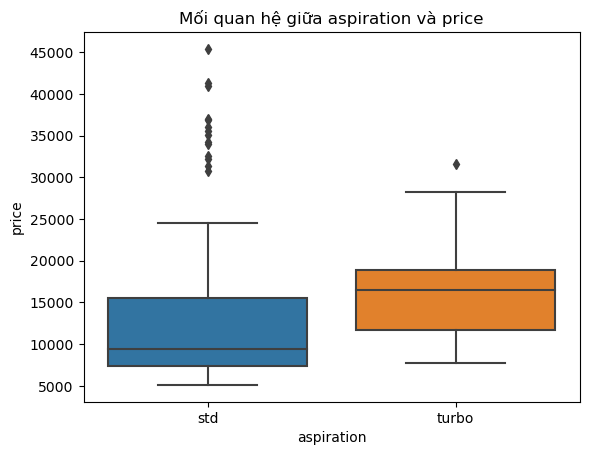

P-Value for Anova is:  0.010700300833183433 <0.05
Hai thuộc tính aspiration và price có liên hệ với nhau


In [36]:
illu('aspiration')
hypo('aspiration', 'price')

## Nhìn vào biểu đồ thấy được:
- Các loại xe chạy bằng turbo aspiration sẽ có giá thành cao hơn
- Xe chạy bằng std aspiration được ưa chuộng hơn (có thể do giá thành rẻ hơn)

In [ ]:
illu('doornumber')
hypo('doornumber', 'price')

In [ ]:
illu('carbody')
hypo('carbody', 'price')

## Nhìn vào biểu đồ thấy được:
- Các loại xe có sedan và hatchback carbody được ưa chuộng hơns
- Xe có kiểu dáng hatchback có giá thành rẻ hơn so với xe có kiểu dáng sedan 

In [ ]:
illu('drivewheel')
hypo('drivewheel', 'price')

In [ ]:
## Nhìn vào biểu đồ thấy được:
- Fwd drivewheel được sử dụng trong nhiều nhất
- Rwd dù có giá thành cao hơn so với 2 loại khác nhưng cũng được sử dụng nhiều chỉ sau fwd

In [ ]:
illu('enginelocation')
hypo('enginelocation', 'price')

## Nhìn vào biểu đồ thấy được:
- Xe có rear enginelocation sẽ có giá thành trung bình cao hơn
- Xe sử dụng front enginelocation được ưa chuộng hơn (có thể do giá thành rẻ hơn)

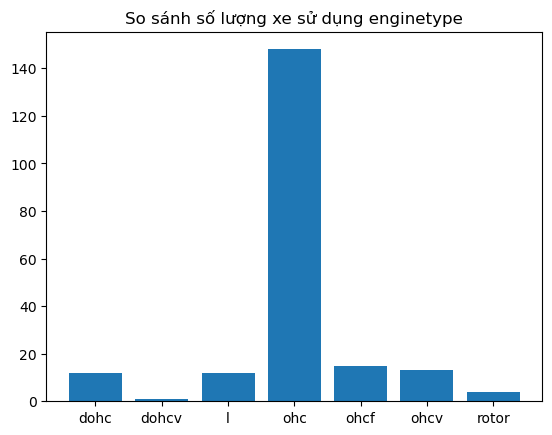

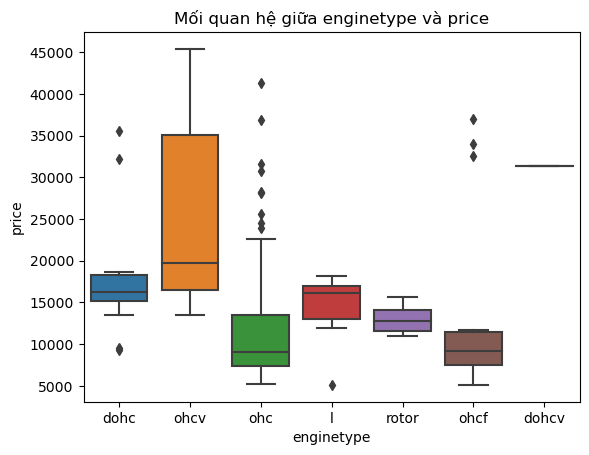

P-Value for Anova is:  4.692664568743044e-09 <0.05
Hai thuộc tính enginetype và price có liên hệ với nhau


In [38]:
illu('enginetype')
hypo('enginetype', 'price')

## Nhìn vào biểu đồ thấy được:
- Các loại xe chạy bằng ohc engine được ưa chuộng hơn so với các loại động cơ khác
- Xét về giá thành, xe sử dụng loại động cơ ohcv có giá thành trung bình cao hơn hẳn so với các loại xe ử dụng động cơ khác (dao động trong mức giá 500 - 25000)

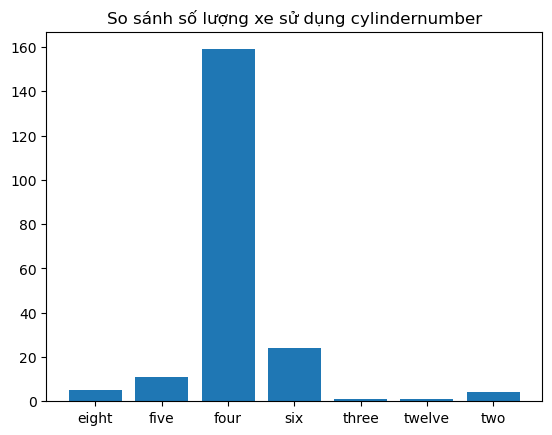

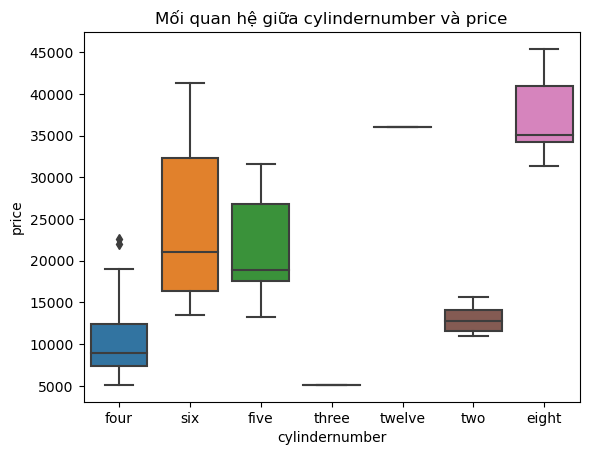

P-Value for Anova is:  8.065780498463557e-41 <0.05
Hai thuộc tính cylindernumber và price có liên hệ với nhau


In [39]:
illu('cylindernumber')
hypo('cylindernumber', 'price')

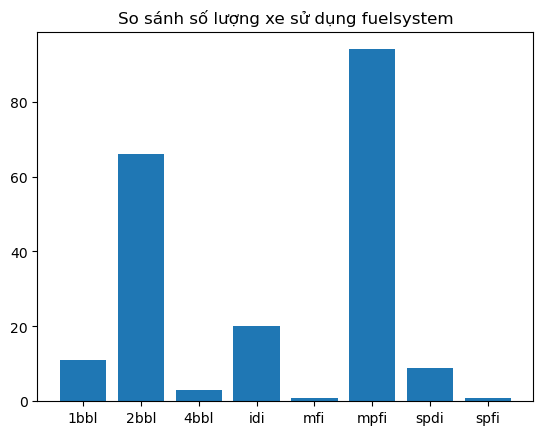

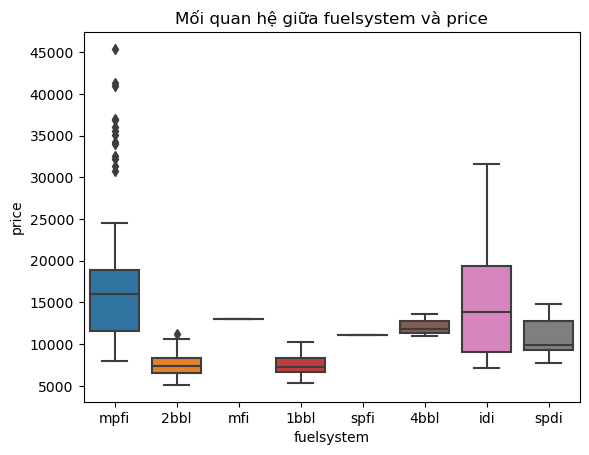

P-Value for Anova is:  2.9903859089321575e-16 <0.05
Hai thuộc tính fuelsystem và price có liên hệ với nhau


In [40]:
illu('fuelsystem')
hypo('fuelsystem', 'price')

## Nhìn vào biểu đồ thấy được:
- Hệ thống nhiên liệu 2bbl và mpfi được sử dụng trong nhiều loại xe
- Giá xe trung bình sử dụng các hệ thống nhiên liệu khác nhau đều dao động từ 10000 - 20000 

In [41]:
hypo('Carmaker', 'price')

P-Value for Anova is:  3.6462600814846445e-53 <0.05
Hai thuộc tính Carmaker và price có liên hệ với nhau


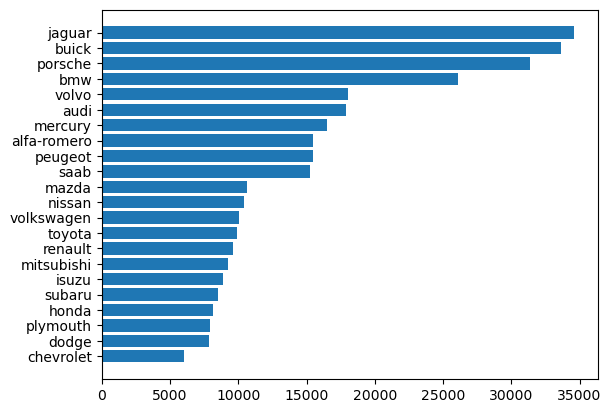

In [42]:
sub1 = dt.groupby('Carmaker')['price'].mean().sort_values(ascending=True)
plt.barh(sub1.index, sub1.values)
plt.show()

### Nhận xét: Nhìn vào biểu đồ có thể thấy hãng xe có giá cao nhất bao gồm jaguar, buick và porsche. Đánh giá chất lượng các hãng xe này

In [43]:
dt[dt['Carmaker'].isin(['jaguar', 'buick', 'porsche'])]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carmaker
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,buick
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


### Nhận xét:
- Trong 3 hãng xe có giá thành trung bình đắt nhất vẫn còn tồn tại 1 số dòng xe được đánh giá thấp về mức độ an toàn (mức 3)

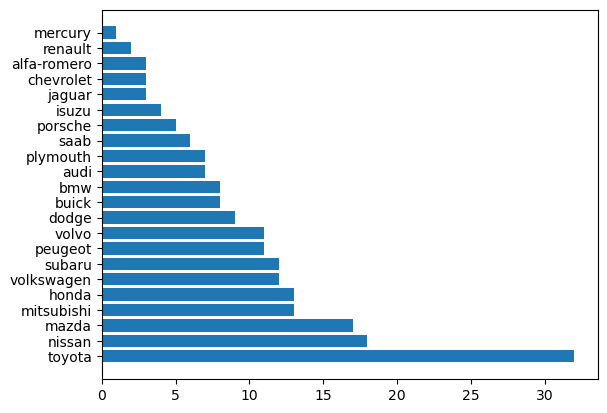

In [44]:
sub2 = dt.groupby('Carmaker')['car_ID'].count().sort_values(ascending=False)
plt.barh(sub2.index, sub2.values)
plt.show()

In [45]:
dt[dt['Carmaker'] == 'toyota']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carmaker
150,151,1,toyota corona mark ii,gas,std,two,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0,toyota
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0,toyota
152,153,1,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0,toyota
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0,toyota
154,155,0,toyota corolla 1600 (sw),gas,std,four,wagon,4wd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0,toyota
155,156,0,toyota carina,gas,std,four,wagon,4wd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0,toyota
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0,toyota
157,158,0,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,...,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0,toyota
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,idi,3.27,3.35,22.5,56,4500,34,36,7898.0,toyota
159,160,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,...,idi,3.27,3.35,22.5,56,4500,38,47,7788.0,toyota


### Nhận xét:
- Các dòng xe thuộc hãng toyota phần lớn có mức độ an toàn > = 0
- Xét về các thành phần xe, hãng toyota chọn các nhân tố giúp hạ giá thành xe. Điều đó dẫn đến giá thành trung bình của xe toyota khá rẻ so với các dòng xe khác

- Nhận xét: Nhìn vào biểu đồ hãng xe Toyota được nhiều người lựa chọn.

In [46]:
hypo('CarName', 'price')

P-Value for Anova is:  1.118000927035784e-17 <0.05
Hai thuộc tính CarName và price có liên hệ với nhau


In [47]:
print('Các thuộc tính có ảnh hưởng đến giá là', effect)

Các thuộc tính có ảnh hưởng đến giá là ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'symboling', 'aspiration', 'enginetype', 'cylindernumber', 'fuelsystem', 'Carmaker', 'CarName']


## Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem những biến nào có độ tương quan lớn với nhau, chỉ giữu lại 1 trong những biến đó đưa vào mô hình)

> # Chuẩn hóa dữ liệu

In [48]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(dt[numerical_features])

dt[numerical_features] = df_s
dt

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carmaker
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,-1.690772,...,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,-1.690772,...,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,-0.708596,...,mpfi,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,0.173698,...,mpfi,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,0.107110,...,mpfi,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,1.721873,...,mpfi,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,1.721873,...,mpfi,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,1.721873,...,mpfi,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,1.721873,...,idi,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582,volvo


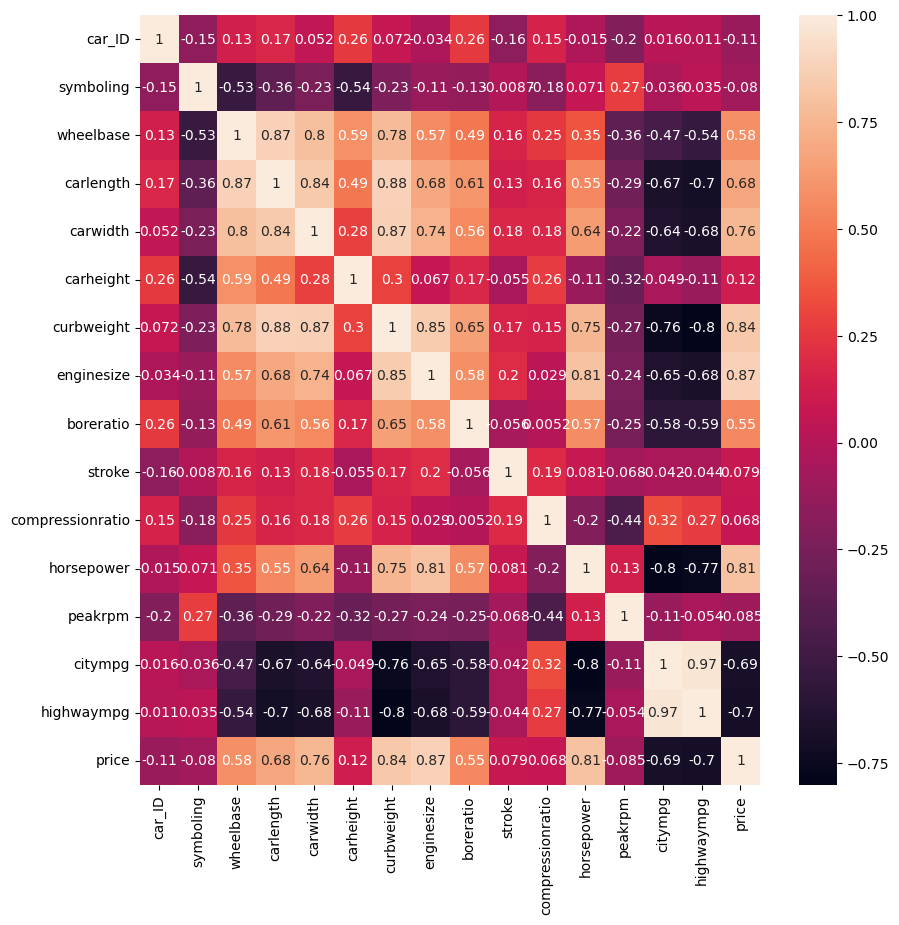

In [49]:
plt.figure(figsize =(10,10)) 
sns.heatmap(dt.corr(), annot = True)
plt.show()

- Nhìn vào heatmap có thể thấy 'citympg' và 'highwaympg' có mối liên hệ tốt nhất ( r = 0.97)

# Tiến hành mã hóa tạo ra các biến dummy từ dữ liệu categorical

In [50]:
df = pd.get_dummies(dt[effect])
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,symboling,...,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,3,...,0,0,0,0,0,0,0,0,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,3,...,0,0,0,0,0,0,0,0,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,1,...,0,0,0,0,0,0,0,0,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,2,...,0,0,0,0,0,0,0,0,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,0.339248,1.666445,0.250533,-0.340094,-0.400490,-1,...,0,0,0,0,1,0,0,0,0,0
201,1.721873,1.198549,1.351515,0.949992,0.339248,1.666445,1.416637,-0.953012,-0.837195,-1,...,0,0,0,1,0,0,0,0,0,0
202,1.721873,1.198549,1.398245,0.878757,1.109571,0.926204,0.757535,-1.106241,-1.128332,-1,...,0,0,0,0,0,1,0,0,0,0
203,1.721873,1.198549,1.398245,1.273437,0.435538,-1.183483,0.047732,0.119594,-0.546059,-1,...,0,0,0,0,0,0,0,1,0,0


# Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất.

> ## Xây dựng Linear Regression

### Model 1: All features

In [51]:
from sklearn.linear_model import LinearRegression
y= dt['price'].values.reshape(-1,1)

x= df.loc[:, ~df.columns.isin(['price'])]

model1 = LinearRegression()
model1.fit(x, y) 
print(model1.intercept_, model1.coef_)

[2.34949454e+12] [[ 1.40418573e-01 -3.19714095e-01  2.15272978e-01  7.60089430e-01
  -1.15692459e-01 -6.72933927e-02  1.23127263e-01 -4.36282513e-02
   8.76557892e-02  1.38653994e-02 -1.68337873e+12 -1.68337873e+12
  -5.38623301e+11 -6.21793276e+11 -1.19689203e+11 -5.38623301e+11
  -4.00884611e+11 -5.38623301e+11 -1.57155904e+11  1.05697700e+10
  -2.10338895e+11 -2.10338895e+11 -2.10338895e+11 -3.71430554e+11
  -2.00737402e+11 -2.79738507e+11 -1.76630252e+10 -1.76630252e+10
  -3.29730810e+11 -1.76630252e+10  1.76116615e+10 -1.76630252e+10
  -1.76630252e+10 -1.76630252e+10  2.07951357e+10  8.47798980e+10
   7.57766290e+10 -3.77959583e+10 -2.61624190e+10  2.88722005e+10
   5.38733377e+10  1.47353378e+11  6.10821329e+10  5.93375060e+10
   5.01195647e+10  1.08965464e+11  5.21989406e+10 -3.77221127e+11
   8.65335361e+10 -8.98658226e+10 -8.22345135e+10  5.06990890e+10
  -5.65752605e+10  1.28095994e+11  2.09904138e+11  9.13790447e+10
   7.97142730e+10  7.97142730e+10  7.97142730e+10  1.572951

> ## Sử dụng feature selection để chọn 10 thuộc tính tốt nhất

In [52]:
df['Price'] =dt['price']
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,symboling,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,Price
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,3,...,0,0,0,0,0,0,0,0,0,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,3,...,0,0,0,0,0,0,0,0,0,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,1,...,0,0,0,0,0,0,0,0,0,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,2,...,0,0,0,0,0,0,0,0,0,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,2,...,0,0,0,0,0,0,0,0,0,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,0.339248,1.666445,0.250533,-0.340094,-0.400490,-1,...,0,0,0,1,0,0,0,0,0,0.447752
201,1.721873,1.198549,1.351515,0.949992,0.339248,1.666445,1.416637,-0.953012,-0.837195,-1,...,0,0,1,0,0,0,0,0,0,0.723810
202,1.721873,1.198549,1.398245,0.878757,1.109571,0.926204,0.757535,-1.106241,-1.128332,-1,...,0,0,0,0,1,0,0,0,0,1.029983
203,1.721873,1.198549,1.398245,1.273437,0.435538,-1.183483,0.047732,0.119594,-0.546059,-1,...,0,0,0,0,0,0,1,0,0,1.153582


In [53]:
corr = df.corr()
corr

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,symboling,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,Price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,-0.470414,-0.544082,-0.531954,...,-0.016977,-0.016977,0.131254,0.131254,0.131254,0.064610,0.120555,0.131254,0.064610,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,-0.670909,-0.704662,-0.357612,...,-0.013365,-0.013365,0.118966,0.118966,0.118966,0.083915,0.083915,0.118966,0.083915,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,-0.642704,-0.677218,-0.232919,...,-0.013342,-0.013342,0.097043,0.099362,0.099362,0.042277,0.097897,0.099362,0.042277,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,-0.757414,-0.797465,-0.227691,...,-0.031888,-0.046311,0.092861,0.071936,0.079867,0.065569,0.089158,0.095155,0.081071,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,-0.653658,-0.677470,-0.105790,...,-0.050406,-0.030181,0.033673,0.033673,0.071904,0.023752,0.030494,0.020531,0.005212,0.874145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CarName_volvo 245,0.064610,0.083915,0.042277,0.065569,0.023752,0.116674,0.017541,-0.013083,-0.028040,-0.103372,...,-0.004902,-0.004902,-0.006949,-0.006949,-0.006949,1.000000,-0.004902,-0.006949,-0.004902,0.028450
CarName_volvo 246,0.120555,0.083915,0.097897,0.089158,0.030494,-0.082860,0.003342,0.008373,-0.038232,-0.103372,...,-0.004902,-0.004902,-0.006949,-0.006949,-0.006949,-0.004902,1.000000,-0.006949,-0.004902,0.080767
CarName_volvo 264gl,0.131254,0.118966,0.099362,0.095155,0.020531,0.136019,0.085256,-0.109804,-0.104772,-0.186501,...,-0.006949,-0.006949,-0.009852,-0.009852,-0.009852,-0.006949,-0.006949,1.000000,-0.006949,0.090246
CarName_volvo diesel,0.064610,0.083915,0.042277,0.081071,0.005212,0.075213,0.102734,-0.088181,-0.089191,-0.103372,...,-0.004902,-0.004902,-0.006949,-0.006949,-0.006949,-0.004902,-0.004902,-0.006949,1.000000,0.049842


In [54]:
# 10 thuộc tính có corr cao nhất
chosen = corr['Price'].nlargest(n=11)
lst = []
for i in chosen.index:
    if i != 'Price':
        lst.append(i)
print('10 thuộc tính tốt nhất trong model là:',lst)

10 thuộc tính tốt nhất trong model là: ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio', 'fuelsystem_mpfi', 'Carmaker_buick', 'cylindernumber_eight']


# Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.

### Model 2: 10 best features

In [55]:

ax2= dt['price'].values.reshape(-1,1)

ax1= df[lst]

model2 = LinearRegression()
model2.fit(ax1, ax2) 
print(model2.intercept_, model2.coef_)

[-0.07637868] [[ 0.31640551  0.12652072  0.35675608  0.05297347 -0.01151004  0.06415195
  -0.02799188  0.08479989  0.97377287 -0.02074867]]


# Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

In [56]:
# Kiểm định chất lượng mô hình 1
import statsmodels.api as sm
exog = sm.add_constant(x)
estimator = sm.OLS(y, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     33.99
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.35e-23
Time:                        19:40:12   Log-Likelihood:                 212.75
No. Observations:                 205   AIC:                            -97.50
Df Residuals:                      41   BIC:                             447.5
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [57]:
# Kiểm định chất lượng mô hình 2
import statsmodels.api as sm
exog = sm.add_constant(ax1)
estimator = sm.OLS(ax2, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           3.91e-72
Time:                        19:40:12   Log-Likelihood:                -101.77
No. Observations:                 205   AIC:                             225.5
Df Residuals:                     194   BIC:                             262.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0764 

> ## Xây dựng thêm mô hình để so sánh

In [58]:
# Chọn 20 thuộc tính có corr cao nhất
choose = corr['Price'].nlargest(n=21)
add = []
for i in choose.index:
    if i != 'Price':
        add.append(i)
print('20 thuộc tính tốt nhất trong model là:',add)

20 thuộc tính tốt nhất trong model là: ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio', 'fuelsystem_mpfi', 'Carmaker_buick', 'cylindernumber_eight', 'cylindernumber_six', 'enginetype_ohcv', 'Carmaker_porsche', 'Carmaker_jaguar', 'Carmaker_bmw', 'CarName_buick regal sport coupe (turbo)', 'cylindernumber_five', 'CarName_bmw x5', 'CarName_buick century special', 'CarName_porsche cayenne']


In [59]:
f2= dt['price'].values.reshape(-1,1)

f1= df[add]

model3 = LinearRegression()
model3.fit(f1,f2) 
print(model3.intercept_, model3.coef_)

[-0.22654408] [[-0.01060868  0.31542291  0.18978294  0.13915096  0.00477598 -0.00743073
  -0.04240118  0.08903608  1.19716481  0.17722262  0.21367776 -0.16508033
   1.70035975  1.17234539  1.00460783  1.60014895  0.11973181  1.49731339
   0.95875293 -0.40123591]]


In [60]:
# Kiểm định chất lượng mô hình 3
import statsmodels.api as sm
exog = sm.add_constant(f1)
estimator = sm.OLS(f2, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           4.78e-98
Time:                        19:40:13   Log-Likelihood:                -10.276
No. Observations:                 205   AIC:                             62.55
Df Residuals:                     184   BIC:                             132.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> ## Nhận xét:
- Cả 3 model đều được xây dựng từ những nhân tố được đánh giá có chỉ số tương quan mạnh với nhân tố price
- Với R - squared (model 1) = 0.993, R - squared (model 2) = 0.842 và R- squared (model 3) = 0.935 thì cả 3 model được đánh giá tốt
- Model 1 được đánh giá tốt hơn so với cả model 2 và 3 tuy nhiên trong thực tế không nên sử dụng model này do đầu vào có quá nhiều thông số cần nhập vào
- Dựa vào chỉ số R- squared, model 3 tốt hơn model 2. Điều đó cho thấy rằng với dataset này, khi xây dựng mô hình dự báo có càng nhiều biến đầu vào thì mô hình càng chính xác